In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("ADS_TCP.csv", engine=None)
data

,Unnamed: 0,acceleration,throttle,steering_target,brake,steering_rate,speed,ego_operation,ego_speed,timeofDay,...,Weather_wetness,pedestrian_count,vehicle_count,weather,test_scenario_number,Traffic_Light,Demand,Diversity,Diversity_AVG,Collision_Probability
0,0,1.21,15.70,0.68,0.0,100.0,5.15,1,3,1,...,0,0,0,0,0,3,6,12053,0.201,0.742
1,1,0.81,23.40,0.50,0.0,100.0,6.24,1,3,1,...,0,0,0,0,1,3,0,13470,0.225,0.074
2,2,1.12,15.70,0.44,0.0,100.0,6.38,1,3,1,...,0,0,0,0,2,3,7,12234,0.204,0.718
3,3,1.42,31.76,0.44,0.0,100.0,6.60,1,3,1,...,0,0,0,0,3,3,19,12199,0.203,0.985
4,4,0.90,24.20,0.54,0.0,100.0,7.03,1,3,1,...,0,0,0,0,4,3,5,11846,0.197,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,-0.30,0.00,0.16,14.5,100.0,0.71,3,2,1,...,0,0,0,0,59995,3,5,10533,0.176,0.593
59996,59996,0.74,75.18,0.15,0.0,100.0,0.80,1,2,1,...,0,0,0,0,59996,3,1,10533,0.176,0.087
59997,59997,1.14,34.06,0.10,0.0,100.0,1.97,1,2,1,...,0,0,0,0,59997,3,5,10533,0.176,0.369
59998,59998,0.73,61.19,0.18,0.0,100.0,2.77,1,2,1,...,0,0,0,0,59998,3,5,10533,0.176,0.652


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60000 non-null  int64  
 1   acceleration           60000 non-null  float64
 2   throttle               60000 non-null  float64
 3   steering_target        60000 non-null  float64
 4   brake                  60000 non-null  float64
 5   steering_rate          60000 non-null  float64
 6   speed                  60000 non-null  float64
 7   ego_operation          60000 non-null  int64  
 8   ego_speed              60000 non-null  int64  
 9   timeofDay              60000 non-null  int64  
 10  trafficRule_sidewalk   60000 non-null  int64  
 11  CollisionInfo          60000 non-null  int64  
 12  Weather_rain           60000 non-null  int64  
 13  Weather_fog            60000 non-null  int64  
 14  Weather_wetness        60000 non-null  int64  
 15  pe

In [4]:
data=data.drop(['Unnamed: 0'],axis=1) 

# train_test_split

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X=data.drop(['CollisionInfo','test_scenario_number'],axis=1) # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [5]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)

C:\Users\100641313\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
import shap
# Fits the explainer
explainer = shap.Explainer(clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 18001it [32:31,  9.19it/s]                                                                      


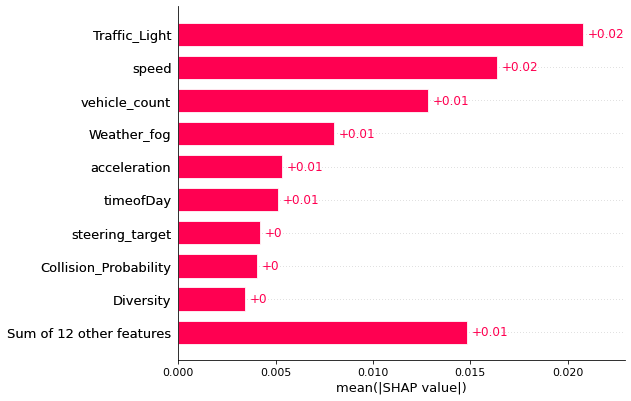

In [7]:
shap.plots.bar(shap_values)

In [12]:
X=data[['Traffic_Light','speed','vehicle_count','Weather_fog','acceleration','timeofDay','steering_target','Collision_Probability','Diversity']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [13]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred_xgb=clf.predict(X_test)
y_pred_xgb_proba=clf.predict_proba(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9572222222222222
f1_score: 0.14444444444444443
recall_score: 0.08430609597924774
precision_score: 0.5038759689922481


# importing evaluation matrix

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decission tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_df = DecisionTreeClassifier(random_state=123)
clf_df.fit(X_train,y_train)
y_pred_d=clf_df.predict(X_test)
y_pred_d_proba=clf_df.predict_proba(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred_d)
f1 = f1_score(y_test, y_pred_d)
recall = recall_score(y_test, y_pred_d)
precission = precision_score(y_test, y_pred_d)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9287777777777778
f1_score: 0.20471464019851116
recall_score: 0.2140077821011673
precision_score: 0.1961950059453032


In [9]:
confusion_matrix(y_test,y_pred_d)
print(pd.crosstab(y_test, y_pred_d, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_d))

Predicted      0    1    All
Actual                      
0          16553  676  17229
1            606  165    771
All        17159  841  18000
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17229
           1       0.20      0.21      0.20       771

    accuracy                           0.93     18000
   macro avg       0.58      0.59      0.58     18000
weighted avg       0.93      0.93      0.93     18000



# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred_rfc=clf_rf.predict(X_test)
y_pred_rfc_proba=clf_rf.predict_proba(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
precission = precision_score(y_test, y_pred_rfc)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9587777777777777
f1_score: 0.11031175059952039
recall_score: 0.05966277561608301
precision_score: 0.7301587301587301


In [11]:
confusion_matrix(y_test,y_pred_rfc)
print(pd.crosstab(y_test, y_pred_rfc, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_rfc))

Predicted      0   1    All
Actual                     
0          17212  17  17229
1            725  46    771
All        17937  63  18000
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17229
           1       0.73      0.06      0.11       771

    accuracy                           0.96     18000
   macro avg       0.84      0.53      0.54     18000
weighted avg       0.95      0.96      0.94     18000



# SVM

In [13]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
y_pred_svm = svm_model_linear.predict(X_test)
 

In [14]:
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
precission = precision_score(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9573333333333334
f1_score: 0.010309278350515464
recall_score: 0.005188067444876783
precision_score: 0.8


In [15]:
confusion_matrix(y_test,y_pred_svm)
print(pd.crosstab(y_test, y_pred_svm, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_rfc))

Predicted      0  1    All
Actual                    
0          17228  1  17229
1            767  4    771
All        17995  5  18000
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17229
           1       0.73      0.06      0.11       771

    accuracy                           0.96     18000
   macro avg       0.84      0.53      0.54     18000
weighted avg       0.95      0.96      0.94     18000



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred_n=clf.predict(X_test)
y_pred_n_proba=clf.predict_proba(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred_n)
f1 = f1_score(y_test, y_pred_n)
recall = recall_score(y_test, y_pred_n)
precission = precision_score(y_test, y_pred_n)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.8924444444444445
f1_score: 0.1111111111111111
recall_score: 0.1569390402075227
precision_score: 0.08599857853589196


In [18]:
confusion_matrix(y_test,y_pred_svm)
print(pd.crosstab(y_test, y_pred_svm, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_rfc))

Predicted      0  1    All
Actual                    
0          17228  1  17229
1            767  4    771
All        17995  5  18000
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17229
           1       0.73      0.06      0.11       771

    accuracy                           0.96     18000
   macro avg       0.84      0.53      0.54     18000
weighted avg       0.95      0.96      0.94     18000



# logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred_lr=clf.predict(X_test)



C:\Users\100641313\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
precission = precision_score(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9571666666666667
f1_score: 0.0
recall_score: 0.0
precision_score: 0.0


C:\Users\100641313\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
confusion_matrix(y_test,y_pred_lr)
print(pd.crosstab(y_test, y_pred_lr, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_lr))

Predicted      0    All
Actual                 
0          17229  17229
1            771    771
All        18000  18000
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17229
           1       0.00      0.00      0.00       771

    accuracy                           0.96     18000
   macro avg       0.48      0.50      0.49     18000
weighted avg       0.92      0.96      0.94     18000



C:\Users\100641313\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\100641313\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\100641313\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred_xgb=clf.predict(X_test)
y_pred_xgb_proba=clf.predict_proba(X_test)

C:\Users\100641313\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.9577222222222223
f1_score: 0.1591160220994475
recall_score: 0.0933852140077821
precision_score: 0.5373134328358209


In [28]:
confusion_matrix(y_test,y_pred_xgb)
print(pd.crosstab(y_test, y_pred_xgb, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_xgb))

Predicted      0    1    All
Actual                      
0          17167   62  17229
1            699   72    771
All        17866  134  18000
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17229
           1       0.54      0.09      0.16       771

    accuracy                           0.96     18000
   macro avg       0.75      0.54      0.57     18000
weighted avg       0.94      0.96      0.94     18000



# Comparison among ML models

In [50]:
metric=pd.read_csv('evaluation_metric.csv',engine=None)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

<AxesSubplot:xlabel='Model'>

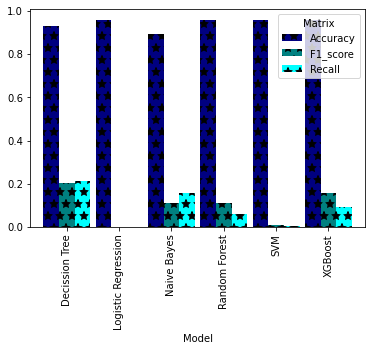

In [51]:
metric.pivot(index='Model', columns='Matrix', values='Score').plot(kind='bar',width=0.9,color=['navy','teal','cyan'],hatch='*')

# model with balance weight

# Decission Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,class_weight='balanced')
clf.fit(X_train,y_train)
y_pred_d_b=clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
ac = accuracy_score(y_test, y_pred_d_b)
f_score = f1_score(y_test ,y_pred_d_b)
p_score = precision_score(y_test, y_pred_d_b)
r_score = recall_score(y_test ,y_pred_d_b)
print("Accuracy:", ac)
print("F1 Score:", f_score)
print('precission',p_score)
print('recall',r_score)

Accuracy: 0.9325
F1 Score: 0.17290673927842068
precission 0.1819484240687679
recall 0.16472114137483787


In [53]:
confusion_matrix(y_test,y_pred_d_b)
print(pd.crosstab(y_test, y_pred_d_b, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_d_b))

Predicted      0    1    All
Actual                      
0          16658  571  17229
1            644  127    771
All        17302  698  18000
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17229
           1       0.18      0.16      0.17       771

    accuracy                           0.93     18000
   macro avg       0.57      0.57      0.57     18000
weighted avg       0.93      0.93      0.93     18000



# XGBoost

In [17]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=data['CollisionInfo'] #provide your own target name
)

In [18]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.8745555555555555
f1_score: 0.3903887688984881
recall_score: 0.9377431906614786
precision_score: 0.2465052846914422


In [20]:
confusion_matrix(y_test,y_pred_xgb)
print(pd.crosstab(y_test, y_pred_xgb, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_xgb))

Predicted      0     1    All
Actual                       
0          15019  2210  17229
1             48   723    771
All        15067  2933  18000
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     17229
           1       0.25      0.94      0.39       771

    accuracy                           0.87     18000
   macro avg       0.62      0.90      0.66     18000
weighted avg       0.96      0.87      0.91     18000



In [52]:
metric_weighted=pd.read_csv('evaluation_metric_weighted.csv',engine=None)


<AxesSubplot:xlabel='Model'>

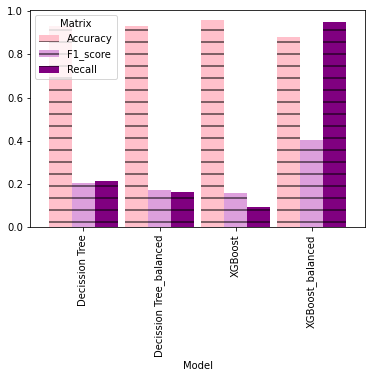

In [71]:
metric_weighted.pivot(index='Model', columns='Matrix', values='Score').plot(kind='bar',width=0.9,color=['pink','plum','purple'],hatch='-')

# Feature Importance

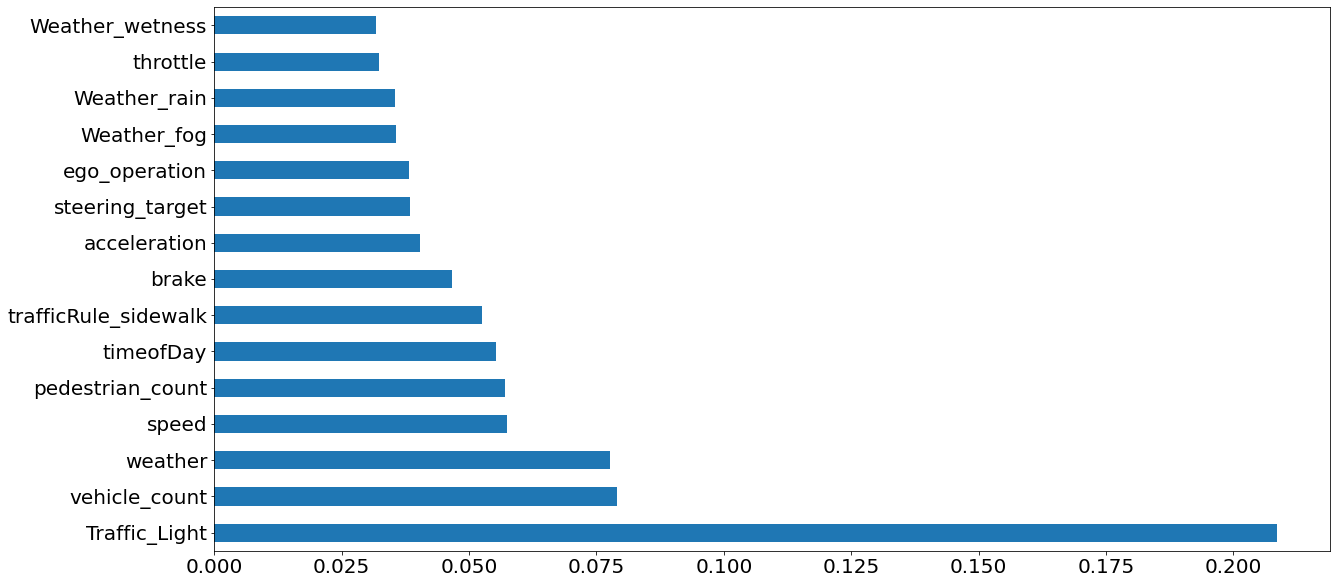

In [65]:
feat_importances = pd.Series(xgb_classifier.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [72]:
feat_importances=feat_importances.nlargest(15)
feat_importances

Traffic_Light           0.208547
vehicle_count           0.078986
weather                 0.077695
speed                   0.057497
pedestrian_count        0.057143
timeofDay               0.055285
trafficRule_sidewalk    0.052462
brake                   0.046589
acceleration            0.040394
steering_target         0.038461
ego_operation           0.038287
Weather_fog             0.035594
Weather_rain            0.035379
throttle                0.032295
Weather_wetness         0.031758
dtype: float32

In [70]:
data

,acceleration,throttle,steering_target,brake,steering_rate,speed,ego_operation,ego_speed,timeofDay,trafficRule_sidewalk,...,Weather_wetness,pedestrian_count,vehicle_count,weather,test_scenario_number,Traffic_Light,Demand,Diversity,Diversity_AVG,Collision_Probability
0,1.21,15.70,0.68,0.0,100.0,5.15,1,3,1,0,...,0,0,0,0,0,3,6,12053,0.201,0.742
1,0.81,23.40,0.50,0.0,100.0,6.24,1,3,1,0,...,0,0,0,0,1,3,0,13470,0.225,0.074
2,1.12,15.70,0.44,0.0,100.0,6.38,1,3,1,0,...,0,0,0,0,2,3,7,12234,0.204,0.718
3,1.42,31.76,0.44,0.0,100.0,6.60,1,3,1,0,...,0,0,0,0,3,3,19,12199,0.203,0.985
4,0.90,24.20,0.54,0.0,100.0,7.03,1,3,1,0,...,0,0,0,0,4,3,5,11846,0.197,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.30,0.00,0.16,14.5,100.0,0.71,3,2,1,0,...,0,0,0,0,59995,3,5,10533,0.176,0.593
59996,0.74,75.18,0.15,0.0,100.0,0.80,1,2,1,0,...,0,0,0,0,59996,3,1,10533,0.176,0.087
59997,1.14,34.06,0.10,0.0,100.0,1.97,1,2,1,0,...,0,0,0,0,59997,3,5,10533,0.176,0.369
59998,0.73,61.19,0.18,0.0,100.0,2.77,1,2,1,0,...,0,0,0,0,59998,3,5,10533,0.176,0.652


In [73]:
X=data[['Traffic_Light','vehicle_count','weather','speed','pedestrian_count','timeofDay','trafficRule_sidewalk','brake','acceleration','steering_target','ego_operation','Weather_fog','Weather_rain','throttle','Weather_wetness']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [84]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=data['CollisionInfo'] #provide your own target name
)

In [86]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)
y_pred_xgb_proba=xgb_classifier.predict_proba(X_test)

[14:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.92085
f1_score: 0.42665700833031506
recall_score: 0.9671592775041051
precision_score: 0.2736988847583643


In [88]:
y_pred_xgb_proba

array([[0.43500733, 0.56499267],
       [0.5799742 , 0.42002583],
       [0.72757536, 0.27242464],
       ...,
       [0.93068796, 0.06931204],
       [0.8282622 , 0.17173779],
       [0.90846   , 0.09153996]], dtype=float32)

# Ego_vehicle Feature_set

In [22]:
X=data[['acceleration','speed','steering_target','brake','ego_operation','ego_speed','steering_rate','throttle']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [24]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.7857777777777778
f1_score: 0.26243305279265494
recall_score: 0.8897535667963683
precision_score: 0.15391518958940992


# Previous study feature set

In [26]:
X=data[['Demand','Diversity','Diversity_AVG','Collision_Probability']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [27]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.7695555555555555
f1_score: 0.2471869328493648
recall_score: 0.8832684824902723
precision_score: 0.14370120278539777


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acceleration           60000 non-null  float64
 1   throttle               60000 non-null  float64
 2   steering_target        60000 non-null  float64
 3   brake                  60000 non-null  float64
 4   steering_rate          60000 non-null  float64
 5   speed                  60000 non-null  float64
 6   ego_operation          60000 non-null  int64  
 7   ego_speed              60000 non-null  int64  
 8   timeofDay              60000 non-null  int64  
 9   trafficRule_sidewalk   60000 non-null  int64  
 10  CollisionInfo          60000 non-null  int64  
 11  Weather_rain           60000 non-null  int64  
 12  Weather_fog            60000 non-null  int64  
 13  Weather_wetness        60000 non-null  int64  
 14  pedestrian_count       60000 non-null  int64  
 15  ve

# Weather feature set

In [32]:
X=data[['weather','Weather_rain','Weather_fog','Weather_wetness','timeofDay']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [33]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.3098888888888889
f1_score: 0.09089578454332552
recall_score: 0.8054474708171206
precision_score: 0.04816567129450089


# traffic rule feature set

In [35]:
X=data[['trafficRule_sidewalk','Traffic_Light']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [36]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.7181666666666666
f1_score: 0.1344480464084627
recall_score: 0.5110246433203631
precision_score: 0.07740667976424362


# obstacle feature set:

In [38]:
X=data[['vehicle_count','pedestrian_count']] # Features
y=data['CollisionInfo']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [39]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X, y, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.6071666666666666
f1_score: 0.10708422780654124
recall_score: 0.5499351491569391
precision_score: 0.05931729155008394


<AxesSubplot:xlabel='Feature set'>

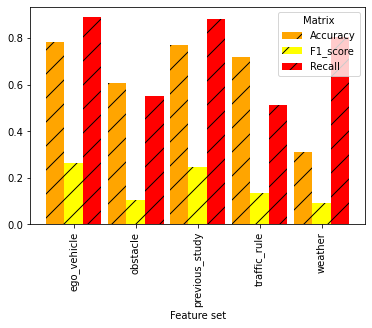

In [49]:
feature_set=pd.read_csv('feature_set.csv',engine=None)
feature_set.pivot(index='Feature set', columns='Matrix', values='Score').plot(kind='bar',width=0.9,color=['orange','yellow','red'],hatch='/')

# Test prioritization

In [74]:
df=data
df

,acceleration,throttle,steering_target,brake,steering_rate,speed,ego_operation,ego_speed,timeofDay,trafficRule_sidewalk,...,Weather_wetness,pedestrian_count,vehicle_count,weather,test_scenario_number,Traffic_Light,Demand,Diversity,Diversity_AVG,Collision_Probability
0,1.21,15.70,0.68,0.0,100.0,5.15,1,3,1,0,...,0,0,0,0,0,3,6,12053,0.201,0.742
1,0.81,23.40,0.50,0.0,100.0,6.24,1,3,1,0,...,0,0,0,0,1,3,0,13470,0.225,0.074
2,1.12,15.70,0.44,0.0,100.0,6.38,1,3,1,0,...,0,0,0,0,2,3,7,12234,0.204,0.718
3,1.42,31.76,0.44,0.0,100.0,6.60,1,3,1,0,...,0,0,0,0,3,3,19,12199,0.203,0.985
4,0.90,24.20,0.54,0.0,100.0,7.03,1,3,1,0,...,0,0,0,0,4,3,5,11846,0.197,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.30,0.00,0.16,14.5,100.0,0.71,3,2,1,0,...,0,0,0,0,59995,3,5,10533,0.176,0.593
59996,0.74,75.18,0.15,0.0,100.0,0.80,1,2,1,0,...,0,0,0,0,59996,3,1,10533,0.176,0.087
59997,1.14,34.06,0.10,0.0,100.0,1.97,1,2,1,0,...,0,0,0,0,59997,3,5,10533,0.176,0.369
59998,0.73,61.19,0.18,0.0,100.0,2.77,1,2,1,0,...,0,0,0,0,59998,3,5,10533,0.176,0.652


In [157]:
df1=df.loc[df['test_scenario_number'] < 59000]
df2=df.loc[df['test_scenario_number'] >= 59000]

In [158]:
df2.loc[df2['CollisionInfo']==1]

,acceleration,throttle,steering_target,brake,steering_rate,speed,ego_operation,ego_speed,timeofDay,trafficRule_sidewalk,...,Weather_wetness,pedestrian_count,vehicle_count,weather,test_scenario_number,Traffic_Light,Demand,Diversity,Diversity_AVG,Collision_Probability
59221,-3.86,0.00,0.21,44.93,100.0,7.96,4,3,1,0,...,0,0,2,0,59221,3,6,10249,0.171,0.792
59358,-0.17,0.00,-13.38,14.50,100.0,7.05,3,3,1,0,...,3,0,0,3,59358,0,8,11676,0.195,0.934
59392,0.19,15.70,0.03,0.00,100.0,9.44,1,4,2,0,...,0,0,0,0,59392,0,6,14602,0.243,0.836
59684,1.07,25.16,0.35,0.00,100.0,7.49,1,3,1,0,...,1,0,0,3,59684,0,0,10151,0.169,0.068
59686,-0.05,0.00,-0.14,14.50,100.0,0.52,3,2,1,0,...,1,0,0,3,59686,0,2,11679,0.195,0.115
59689,1.02,27.01,1.56,0.00,100.0,4.97,6,2,1,0,...,3,0,0,4,59689,0,3,10535,0.176,0.439
59690,1.09,15.70,1.26,0.00,100.0,5.64,6,3,1,0,...,3,0,0,4,59690,0,1,10151,0.169,0.253
59758,0.00,0.00,0.00,50.00,0.0,0.00,3,1,2,0,...,3,0,0,4,59758,0,4,11725,0.195,0.785
59770,0.00,0.00,0.00,50.00,0.0,0.00,3,1,2,0,...,3,0,0,4,59770,0,0,11219,0.187,0.254


In [204]:
X_train=df1.drop(['CollisionInfo','test_scenario_number'],axis=1) 
y_train=df1['CollisionInfo']
X_test=df2.drop(['CollisionInfo','test_scenario_number'],axis=1) 
y_test=df2['CollisionInfo']

In [205]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=df1['CollisionInfo'] #provide your own target name
)

In [206]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_xgb=xgb_classifier.predict(X_test)
y_pred_xgb_proba=xgb_classifier.predict_proba(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [207]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precission = precision_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("f1_score:", f1)
print("recall_score:", recall)
print("precision_score:", precission)

Accuracy: 0.95
f1_score: 0.07407407407407407
recall_score: 0.2222222222222222
precision_score: 0.044444444444444446


In [208]:
confusion_matrix(y_test,y_pred_xgb)
print(pd.crosstab(y_test, y_pred_xgb, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_xgb))

Predicted    0   1   All
Actual                  
0          948  43   991
1            7   2     9
All        955  45  1000
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       991
           1       0.04      0.22      0.07         9

    accuracy                           0.95      1000
   macro avg       0.52      0.59      0.52      1000
weighted avg       0.98      0.95      0.97      1000



In [209]:
y_pred_xgb_proba

array([[0.9065341 , 0.09346593],
       [0.94085187, 0.05914814],
       [0.86231637, 0.13768366],
       ...,
       [0.8947909 , 0.1052091 ],
       [0.9423016 , 0.05769842],
       [0.9646473 , 0.03535272]], dtype=float32)

In [210]:
result2 = pd.DataFrame(y_pred_xgb_proba, columns=['probability of class 0','probability of class 1'])
result2

,probability of class 0,probability of class 1
0,0.906534,0.093466
1,0.940852,0.059148
2,0.862316,0.137684
3,0.900977,0.099023
4,0.814778,0.185222
...,...,...
995,0.813387,0.186613
996,0.976214,0.023786
997,0.894791,0.105209
998,0.942302,0.057698


In [211]:
y_test=df2[['CollisionInfo']]

In [212]:
y_test = y_test.reset_index(drop=True)
y_test

,CollisionInfo
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [213]:
y_test.rename(columns = {'CollisionInfo':'actual'}, inplace = True)

In [214]:
result = pd.DataFrame(y_pred_xgb, columns=['predicted'])
result

,predicted
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [215]:
result = pd.concat([y_test, result,result2],axis=1)
result['test scenario number'] = result.index
result

,actual,predicted,probability of class 0,probability of class 1,test scenario number
0,0,0,0.906534,0.093466,0
1,0,0,0.940852,0.059148,1
2,0,0,0.862316,0.137684,2
3,0,0,0.900977,0.099023,3
4,0,0,0.814778,0.185222,4
...,...,...,...,...,...
995,0,0,0.813387,0.186613,995
996,0,0,0.976214,0.023786,996
997,0,0,0.894791,0.105209,997
998,0,0,0.942302,0.057698,998


In [216]:

result=result[['test scenario number','actual','predicted','probability of class 1']]
result

,test scenario number,actual,predicted,probability of class 1
0,0,0,0,0.093466
1,1,0,0,0.059148
2,2,0,0,0.137684
3,3,0,0,0.099023
4,4,0,0,0.185222
...,...,...,...,...
995,995,0,0,0.186613
996,996,0,0,0.023786
997,997,0,0,0.105209
998,998,0,0,0.057698


In [217]:
result.loc[result['actual']==1]

,test scenario number,actual,predicted,probability of class 1
221,221,1,0,0.168608
358,358,1,1,0.774659
392,392,1,0,0.455851
684,684,1,0,0.137365
686,686,1,0,0.413772
689,689,1,0,0.033318
690,690,1,0,0.033256
758,758,1,1,0.676904
770,770,1,0,0.344615


In [218]:
df_result=result.sort_values(by="probability of class 1",ascending=False)

In [219]:
df_result.to_csv("df_result.csv")

In [223]:
df_result=pd.read_csv("df_result.csv",engine=None)

In [224]:
df_result['prioritize order'] = result.index
df_result.loc[df_result['actual']==1]

,test scenario number,actual,predicted,probability of class 1,prioritize order
4,358,1,1,0.774659,4
19,758,1,1,0.676904,19
60,392,1,0,0.455851,60
76,686,1,0,0.413772,76
98,770,1,0,0.344615,98
260,221,1,0,0.168608,260
311,684,1,0,0.137365,311
685,689,1,0,0.033318,685
686,690,1,0,0.033256,686
